In [9]:
from sklearn import tree
import pandas as pd
from sklearn import model_selection

In [3]:
dt = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)

In [5]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [6]:
df.sample(2)

,sex,exang,num
118,1,1,0
212,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     238 non-null    int64
 1   exang   238 non-null    int64
 2   num     238 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


In [8]:
X, y = df.drop(['num'], axis=1), df[['num']]

In [10]:
dt = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
dt.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [13]:
clf = model_selection.GridSearchCV(estimator=dt, param_grid={'max_depth': range(1, 238)}).fit(X, y)

In [14]:
clf.best_params_

{'max_depth': 1}

In [22]:
graph = clf.best_estimator_.tree_

[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.25, 'entropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.75, 0.25, 'entropy = 0.826\nsamples = 81\nvalue = [21, 60]')]

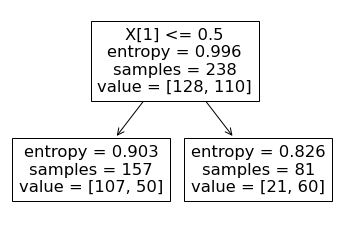

In [23]:
tree.plot_tree(clf.best_estimator_)

In [25]:
graph.children_left[0]

1

In [30]:
graph.impurity[0] - graph.impurity[1] *graph.n_node_samples[1]/graph.n_node_samples[0] - graph.impurity[2]*graph.n_node_samples[2]/graph.n_node_samples[0]

0.11939340343891597

In [29]:
graph.n_node_samples[0]

238

In [31]:
dt = tree.DecisionTreeClassifier()

In [32]:
dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}